In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/mlproject/perrin.csv')
df.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.columns = ['Months','Sales']
df.head(5)

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.isnull()

,Months,Sales
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
102,False,False
103,False,False
104,False,False
105,True,True


In [ ]:
df.drop(105,axis=0,inplace=True)
df.drop(106,axis=0,inplace=True)
df.isnull().sum()

Months    0
Sales     0
dtype: int64

In [ ]:
df.dtypes

Months     object
Sales     float64
dtype: object

In [ ]:
df['Months'] = pd.to_datetime(df['Months'])
df.dtypes

Months    datetime64[ns]
Sales            float64
dtype: object

In [ ]:
df.set_index('Months',inplace=True)
df.head(5)

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Months'>

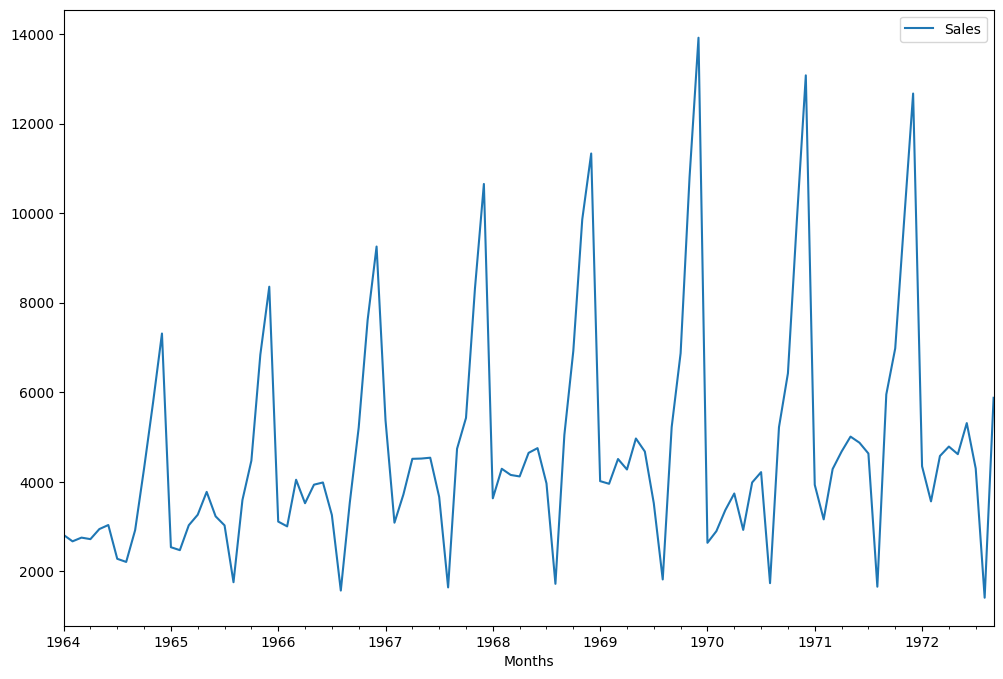

In [ ]:
df.plot(figsize= (12,8))

Testing for Stationarity use Dickey Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Accept Null Hpyo means dataset is Not Stationary
# Reject Null Hypo Means dataset is Stationary
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test statistic','p-value','#lags used','Number of Observations']
    for values, label in zip(result,labels):
        print(label +':'+ str(values))
    if(result[1] <= 0.05):
        print("The Dataset is stationary, Reject Null Hypothesis")
    else:
        print("The Dataset is Not Stationary, Accept Null Hypothesis")

In [ ]:
adfuller_test(df['Sales'])

ADF Test statistic:-1.8335930563276215
p-value:0.36391577166024586
#lags used:11
Number of Observations:93
The Dataset is Not Stationary, Accept Null Hypothesis


My p-value is > 0.05 so we accept Null Hypothises and prove that data is Not Stationary

## Differencing

In [ ]:
df['Seasonal Sales Diff'] = df['Sales'] - df['Sales'].shift(12)
df

,Sales,Seasonal Sales Diff
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,-392.0
1972-06-01,5312.0,438.0
1972-07-01,4298.0,-335.0


In [ ]:
adfuller_test(df['Seasonal Sales Diff'].dropna())

ADF Test statistic:-7.626619157213166
p-value:2.0605796968136632e-11
#lags used:0
Number of Observations:92
The Dataset is stationary, Reject Null Hypothesis


<Axes: xlabel='Months'>

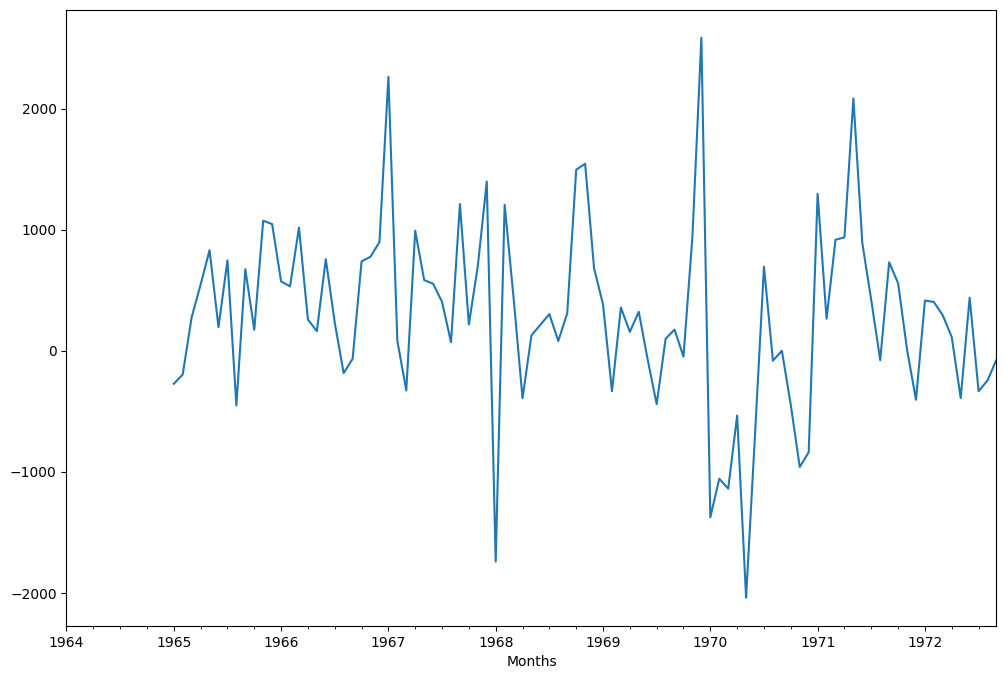

In [ ]:
df['Seasonal Sales Diff'].plot(figsize=(12,8))

Now This Data Looks stationary

Identify AR model by best score of PACF
shut off phase
Identify MA model is done by best of ACF rather than PACF
shut iff phase

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

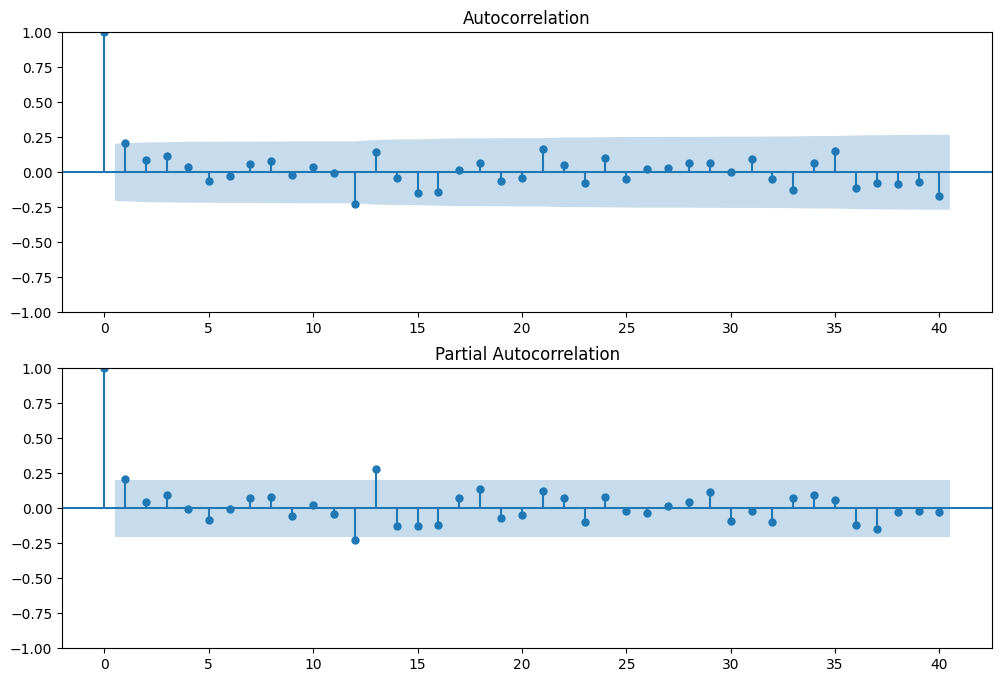

In [ ]:
fig =plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Sales Diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Sales Diff'].iloc[13:],lags= 40,ax=ax2)

Here we need to find three values p,d,q
p = AR model lags
d = differencing /Integrated
q = MA model Lags

In [ ]:
# For Non Seasonal Data
#p=1 d=1 q can be 0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(df['Sales'],order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 03 Oct 2023   AIC                           1911.627
Time:                        08:11:53   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df.tail(20)

,Sales,Seasonal Sales Diff
Months,,
1971-02-01,3162.0,263.0
1971-03-01,4286.0,916.0
1971-04-01,4676.0,936.0
1971-05-01,5010.0,2083.0
1971-06-01,4874.0,888.0
1971-07-01,4633.0,416.0
1971-08-01,1659.0,-79.0
1971-09-01,5951.0,730.0
1971-10-01,6981.0,557.0


<Axes: xlabel='Months'>

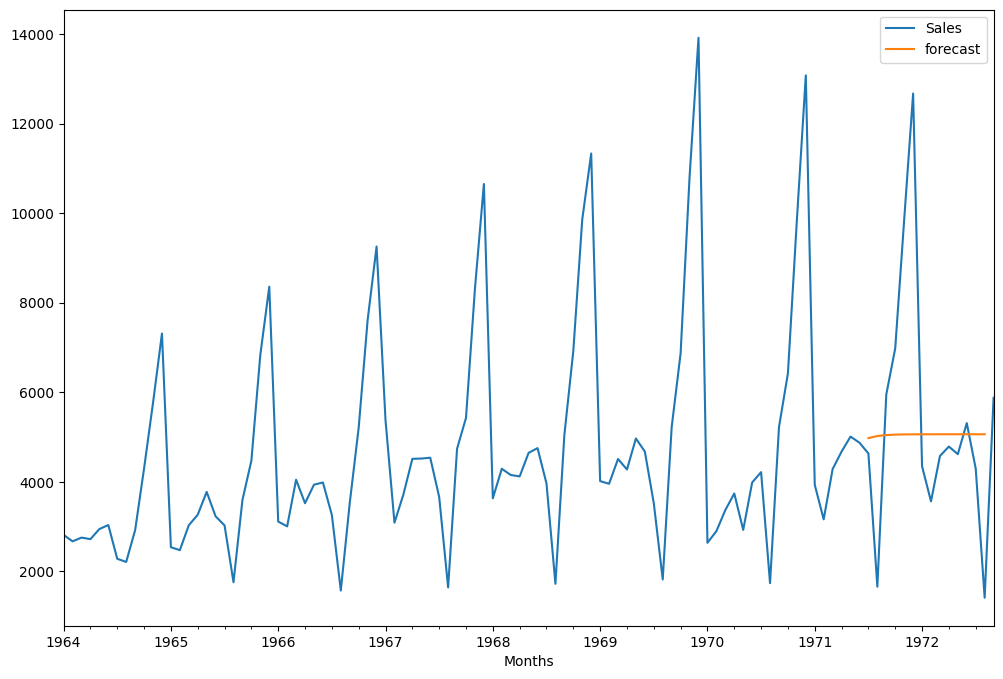

In [ ]:
df['forecast'] = model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results.predict(start=103,end=2000,dynamic=True)

1972-08-01     1761.633508
1972-09-01     5993.617671
1972-10-01     7073.963012
1972-11-01    10027.928605
1972-12-01    12918.586698
                  ...     
2130-05-01    37094.893246
2130-06-01    37614.669561
2130-07-01    36682.529254
2130-08-01    34073.629234
2130-09-01    38342.271376
Freq: MS, Name: predicted_mean, Length: 1898, dtype: float64

In [ ]:
pickle.dump(results, open("time_model.pkl", "wb"))

In [ ]:
model_mtd2 = pickle.load(open("time_model.pkl", "rb"))

<Axes: xlabel='Months'>

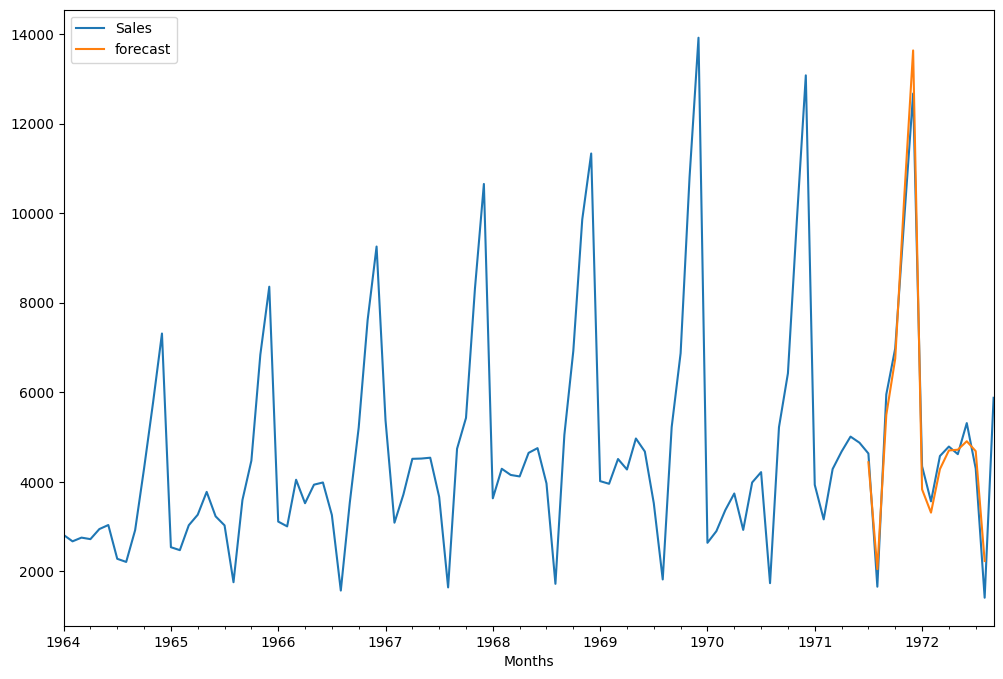

In [ ]:
df['forecast'] = model_mtd2.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

Adding Future Dates to the Dataset.

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [ ]:
future_dataset_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_dataset_df.shape

(23, 3)

In [ ]:
future_df = pd.concat([df,future_dataset_df])

<Axes: >

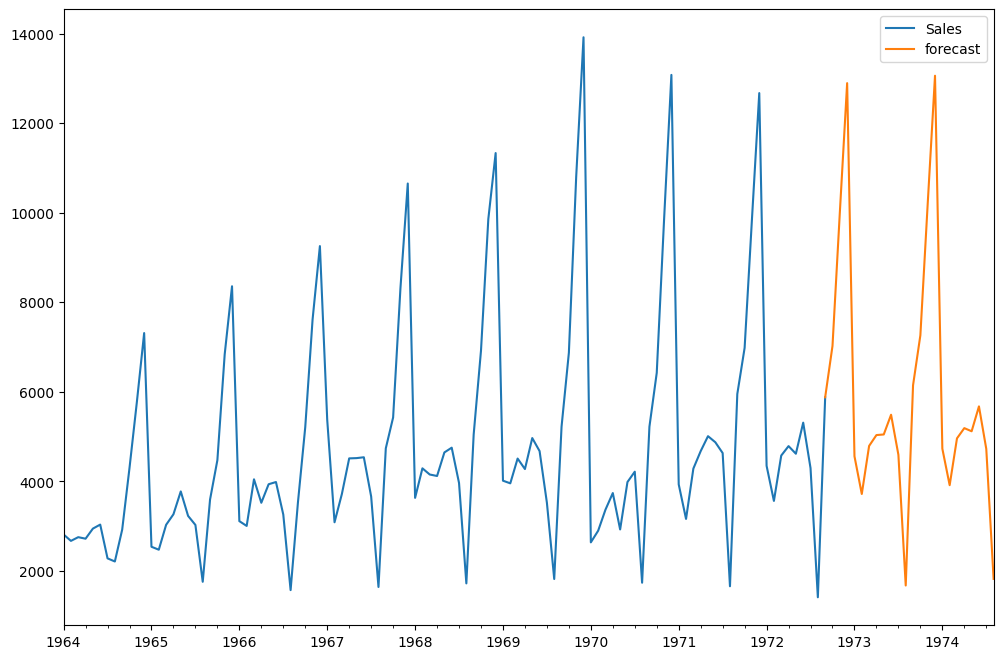

In [ ]:
future_df['forecast'] = results.predict(start=104,end=300,dynamic=True)

future_df[['Sales','forecast']].plot(figsize=(12,8))